In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# loading Data
For all Data sets available with Scikit-learn, look at:
http://scikit-learn.org/stable/datasets/index.html

## Wisconsin Breast Cancer Data Set

In [2]:
cancer_data = load_breast_cancer()

In [ ]:
print(cancer_data.DESCR)

## getting familiar with data

In [ ]:
cancer_data.keys()

In [ ]:
cancer_data.feature_names

In [ ]:
cancer_data.data

## Converting to a Pandas DataFrame

In [3]:
df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [ ]:
df.head()

In [ ]:
df.describe()

In [4]:
df['target'] = cancer_data.target

In [ ]:
df['target'].value_counts()

In [ ]:
cancer_data.target_names

In [ ]:
df.head(20)

## Splitting into Train and Test Sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data,
    cancer_data.target,
    #stratify = cancer_data.target,
    shuffle = True,random_state=100)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_train[y_train == 0].size

In [ ]:
y_test[y_test == 0].size

## Applying our First Model with Scikit-learn: KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.96


### Training our model

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Making Predictions

In [8]:
print("Test set predictions: {}".format(knn.predict(X_test)))

Test set predictions: [1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1]


### Testing Accuracy

In [69]:
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.95


### Improving the Model Performance

Min Max Scaling scales the numeric values of a dataset by transforming them into a range between 0 and 1. The formula used is as follows:

X_std = (X - X.min) / (X.max - X.min)


X_scaled = X_std * (max - min) + min


In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

In [73]:
knn.fit(X_train_minmax_scaled, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_minmax_scaled, y_test)))
print("Train set accuracy: {:.2f}".format(knn.score(X_train_minmax_scaled, y_train)))


Test set accuracy: 0.96
Train set accuracy: 0.97


### Testing with different values of k

In [77]:
train_accuracy = []
test_accuracy = []

neighbors = range(1, 11)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_minmax_scaled, y_train)
    train_accuracy.append(knn.score(X_train_minmax_scaled, y_train))
    test_accuracy.append(knn.score(X_test_minmax_scaled, y_test))
    


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

### Plotting results of diffrent values of k

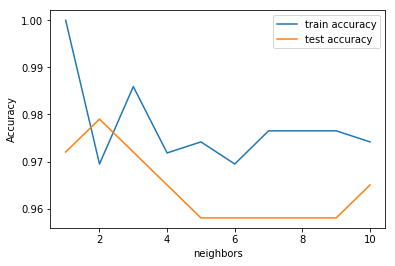

In [78]:
plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("neighbors")
plt.legend()

In [82]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_minmax_scaled, y_train)
print(knn.score(X_train_minmax_scaled, y_train))
print(knn.score(X_test_minmax_scaled, y_test))

0.9741784037558685
0.965034965034965
